In [3]:
import pandas as pd

In [4]:
footprints = pd.read_table('footprints_pos_neg.bed', names="chr start end motif_cluster score strand thickstart thickend itemRgb best_model match_score DBD num_models seqname start2 end2 identifier2 mean_signal numsamples summit core_start core_end component score1 score3 log_cuts_per_base basepairoverlap".split(), header=None)
footprints_dropduplicates = footprints.drop_duplicates(subset="chr start end".split())

In [2]:
has_motif_log_cuts_per_base = {}
hasnt_motif_log_cuts_per_base = {}
grouping = footprints_dropduplicates.groupby("chr start2 end2".split())
log_cuts_per_group = grouping.log_cuts_per_base.first()
for motif in footprints_dropduplicates.motif_cluster.unique():
    has_motif_mask = grouping.apply(lambda g: motif in g.motif_cluster.values)
    has_motif_log_cuts_per_base[motif] = log_cuts_per_group[has_motif_mask]
    hasnt_motif_log_cuts_per_base[motif] = log_cuts_per_group[~ has_motif_mask]

NameError: name 'footprints_dropduplicates' is not defined

In [1]:
import seaborn
fig1 = seaborn.kdeplot(has_motif_log_cuts_per_base['HINFP1/2'], label = 'log cuts per base with motif', bw =0.25)
fig2 = seaborn.kdeplot(hasnt_motif_log_cuts_per_base['HINFP1/2'], label = 'log cuts per base without motif', bw=0.25)

NameError: name 'has_motif_log_cuts_per_base' is not defined

Text(0, 0.5, 'frequency')

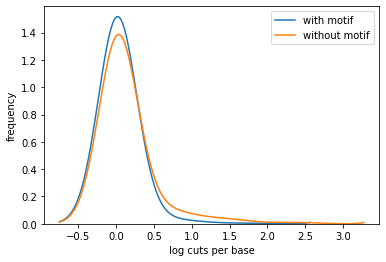

In [17]:
has_motif = has_motif_log_cuts_per_base['HD/10']
W = len(has_motif)
hasnt_motif = hasnt_motif_log_cuts_per_base['HD/10'].sample(W)
import seaborn
import matplotlib.pyplot as plt
seaborn.kdeplot(has_motif, label = 'with motif', bw =0.25)
seaborn.kdeplot(hasnt_motif, label = 'without motif', bw =0.25)
plt.xlabel('log cuts per base')
plt.ylabel('frequency')

In [ ]:
footprint_pos_neg.bed = 